In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.partial_dependence import plot_partial_dependence
#import sklearn.metrics.confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
%matplotlib inline

In [319]:
df = pd.read_csv('data/churn.csv')

In [323]:
df.shape

(50000, 12)

In [8]:
type(df.last_trip_date.values[0])

str

In [37]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] =  pd.to_datetime(df['signup_date'])
churn_date = datetime.datetime.strptime('2014-06-01', '%Y-%m-%d')
df['churn'] = (df['last_trip_date'] > churn_date).astype(int)

In [38]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


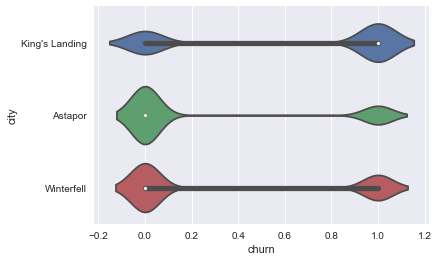

In [300]:
# avg_rating_of_driver
#df.hist('city')
sns.violinplot(df.churn, df.city)

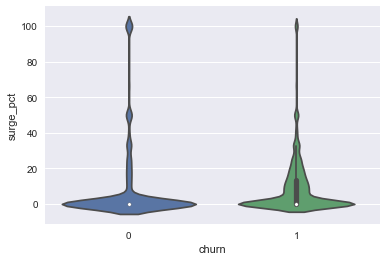

In [299]:

sns.violinplot(df.churn, df.surge_pct)

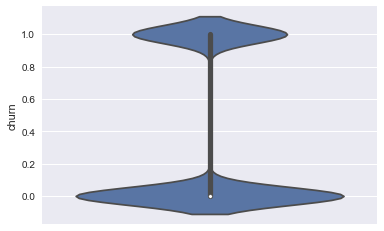

In [164]:
sns.violinplot(y  =df.churn)

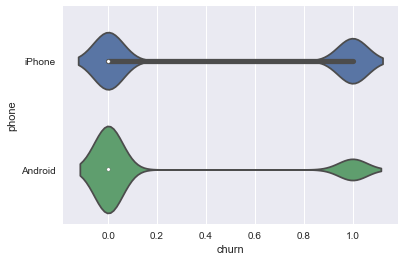

In [294]:
sns.violinplot(df.churn, df.phone)

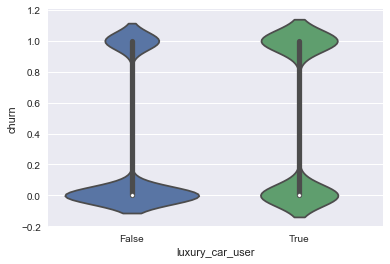

In [41]:
sns.violinplot(df.luxury_car_user, df.churn)

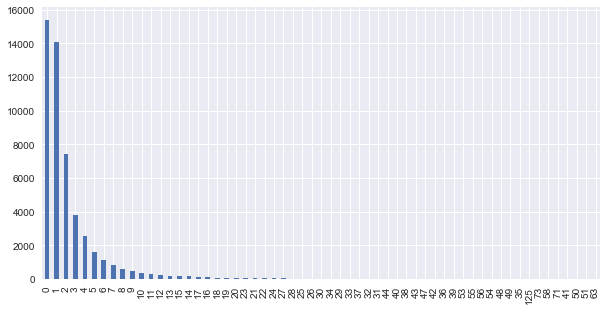

In [57]:
df.trips_in_first_30_days.value_counts().plot(kind='bar', figsize = (10, 5))


In [48]:
df.trips_in_first_30_days.value_counts()

0      15390
1      14108
2       7402
3       3788
4       2562
5       1616
6       1134
7        819
8        589
9        471
10       349
11       301
12       221
13       168
15       155
14       147
17       113
16       108
18        80
19        69
20        51
23        45
21        40
22        34
24        33
27        28
28        21
25        20
26        19
30        15
34        11
29         9
33         9
37         9
32         8
31         6
44         5
40         5
38         4
43         4
47         3
42         3
36         3
39         3
53         2
55         2
56         2
54         2
48         2
49         2
35         2
125        1
73         1
58         1
71         1
41         1
50         1
51         1
63         1
Name: trips_in_first_30_days, dtype: int64

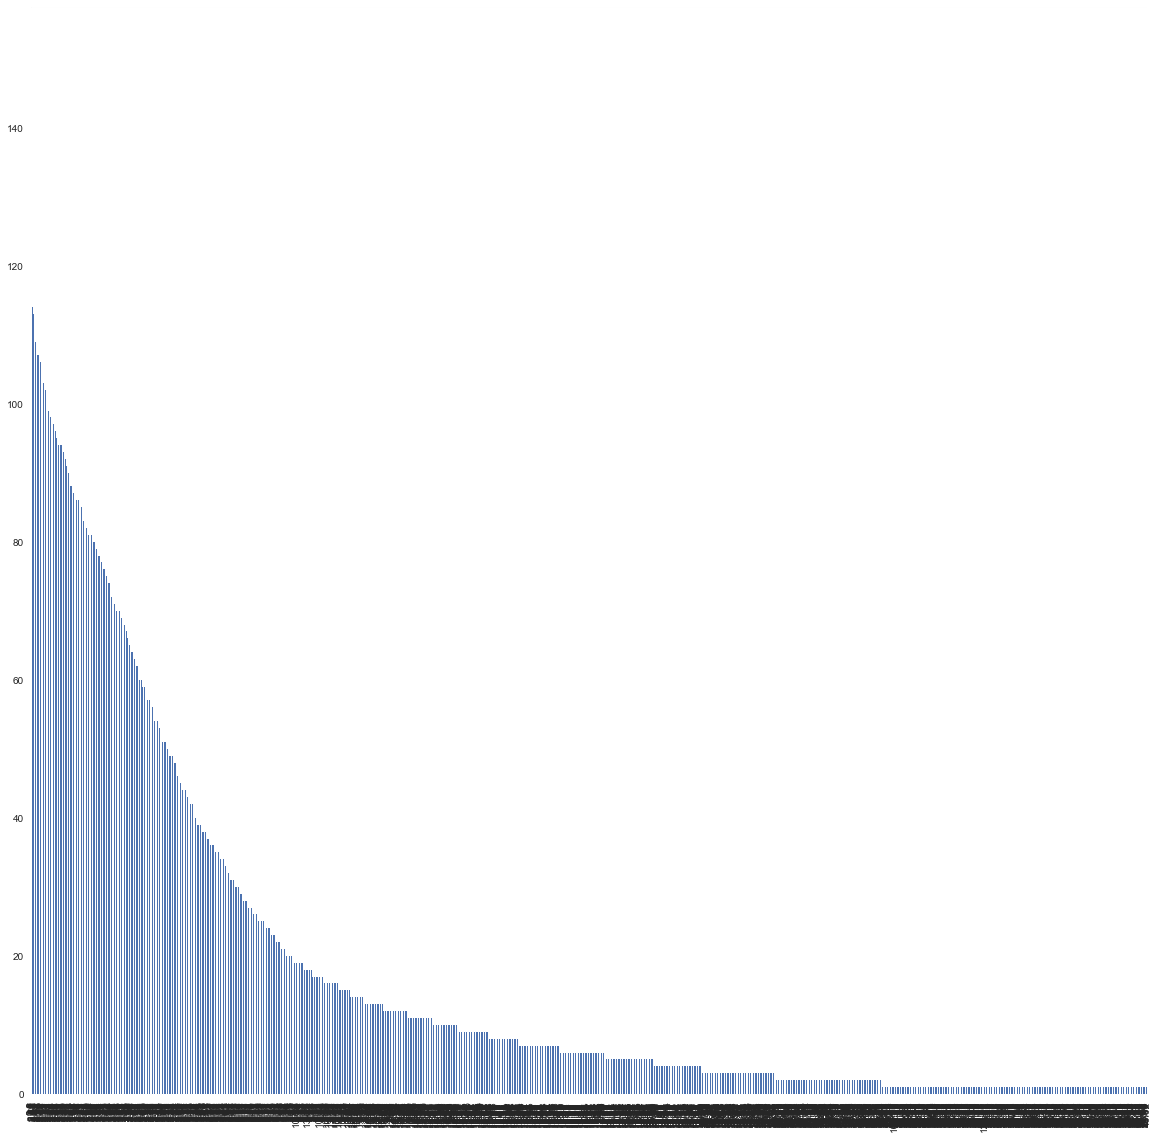

In [49]:
df.avg_dist.value_counts().plot(kind='bar', figsize = (20, 20))

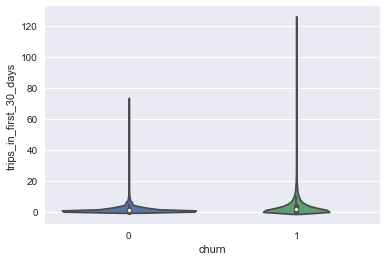

In [51]:
sns.violinplot(df.churn, df.trips_in_first_30_days)

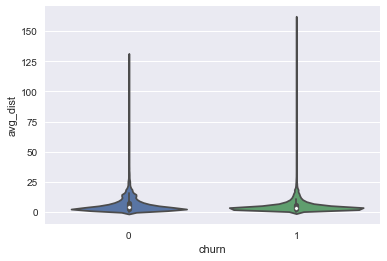

In [58]:
sns.violinplot(df.churn, df.avg_dist)

In [59]:
# Features to use: trips in first 30days, 
#luxury_car_user, phone, city, average_rating_of_driver, average_surge
# later add membership duration
# dummify city, phone, luxury car user True False to 0 or 1

In [60]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [61]:
features=['avg_rating_of_driver', 'avg_surge', 'trips_in_first_30_days', 'weekday_pct']

In [63]:
X = df[features].values
y = df['churn'].values

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
np.shape(X_train)

(40000, 4)

# Logistic Regression Model

In [154]:
df = pd.read_csv('data/churn.csv')
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] =  pd.to_datetime(df['signup_date'])
churn_date = datetime.datetime.strptime('2014-06-01', '%Y-%m-%d')
df['churn'] = (df['last_trip_date'] > churn_date).astype(int)
#df['luxury_car_user']
df = df.join(pd.get_dummies(df.city, drop_first= True))
df = df.join(pd.get_dummies(df.phone, drop_first=True))
df['life'] = (churn_date - df.signup_date)/np.timedelta64(1, 'D')# Replace the missing values in any column by large -ve value and create
# another indicator column
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(-1000)
df['avg_rating_by_driver'] = df['avg_rating_of_driver'].fillna(-1000)

df['IND_avg_rating_of_driver'] = (df['avg_rating_of_driver'].isnull()).astype(int)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,King's Landing,Winterfell,iPhone,life,IND_avg_rating_of_driver
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,1,0,1,127.0,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,0,0,0,123.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,0,0,1,146.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,1,0,1,142.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,0,1,0,125.0,0


In [133]:
sum(df["membership_duration"].isnull())

0

In [317]:
#features_1 = ['IND_avg_rating_of_driver', 'avg_rating_of_driver', 'avg_surge', 'trips_in_first_30_days', 'weekday_pct', "King's Landing", 'Winterfell', 'iPhone', 'life']
features_1 = ['surge_pct','weekday_pct',"King's Landing" ]
X = df[features_1].values
y = df['churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [287]:
def logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    # predict class labels for the test set (Churn = True, Not Churn = False)
    predicted = model.predict(X_test)
    # generate class probabilities
    probs = model.predict_proba(X_test)
    return model, predicted, probs

In [288]:
model, predicted, probs = logistic_regression(X_train, X_test, y_train, y_test)

In [289]:
print 'Accuracy: ', metrics.accuracy_score(y_test, predicted)
print 'Precision: ', metrics.precision_score(y_test, predicted)
print 'Recall: ', metrics.recall_score(y_test, predicted)

Accuracy:  0.6872
Precision:  0.621957277695
Recall:  0.34595192042


In [290]:
# examine the coefficients
model.coef_
print ''
print 'Coefficient for each column:'
print pd.DataFrame(zip(features_1, np.transpose(model.coef_)))


Coefficient for each column:
                0                    1
0       surge_pct  [0.000433334018994]
1     weekday_pct   [0.00108828789013]
2  King's Landing      [1.33337279024]


In [292]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
print ' 10 fold cross-validation scores: ' ,scores
print 'Mean of scores: ', scores.mean()

 10 fold cross-validation scores:  [ 0.67458135  0.6805      0.68625     0.67225     0.6875      0.67925
  0.68525     0.68        0.68725     0.69267317]
Mean of scores:  0.682550452295


# Random Forest

In [200]:
def random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=40)
    model.fit(X_train, y_train)
    # predict class labels for the test set (Churn = True, Not Churn = False)
    predicted = model.predict(X_test)
    # generate class probabilities
    probs = model.predict_proba(X_test)
    return model, predicted, probs

In [201]:
model, predicted, probs = random_forest(X_train, X_test, y_train, y_test)

In [204]:
print 'Accuracy: ', metrics.accuracy_score(y_test, predicted)
print 'Precision: ', metrics.precision_score(y_test, predicted)
print 'Recall: ', metrics.recall_score(y_test, predicted)
print 'F-1 score', metrics.f1_score(y_test, predicted)

Accuracy:  0.7458
Precision:  0.673867386739
Recall:  0.606863009997
F-1 score 0.638612453796


# Adaboost 

In [260]:
def ada_boost(X_train, X_test, y_train, y_test):
    model = AdaBoostClassifier(learning_rate = 0.1, n_estimators=37)
    model.fit(X_train, y_train)
    # predict class labels for the test set (Churn = True, Not Churn = False)
    predicted = model.predict(X_test)
    # generate class probabilities
    probs = model.predict_proba(X_test)
    return model, predicted, probs

In [261]:
model, predicted, probs = ada_boost(X_train, X_test, y_train, y_test)

In [262]:
print 'Accuracy: ', metrics.accuracy_score(y_test, predicted)
print 'Precision: ', metrics.precision_score(y_test, predicted)
print 'Recall: ', metrics.recall_score(y_test, predicted)
print 'F-1 score', metrics.f1_score(y_test, predicted)

Accuracy:  0.7398
Precision:  0.733135341536
Recall:  0.466900837611
F-1 score 0.570485308683


ValueError: gbrt has to be an instance of BaseGradientBoosting

In [206]:
# Gradient Boost

In [301]:
def gradient_boost(X_train, X_test, y_train, y_test):
    model = GradientBoostingClassifier(learning_rate = 0.15, n_estimators=400)
    model.fit(X_train, y_train)
    # predict class labels for the test set (Churn = True, Not Churn = False)
    predicted = model.predict(X_test)
    # generate class probabilities
    probs = model.predict_proba(X_test)
    return model, predicted, probs

In [314]:
np.random.seed(0)
grad_boost, predicted, probs = gradient_boost(X_train, X_test, y_train, y_test)

In [313]:
print 'Accuracy: ', metrics.accuracy_score(y_test, predicted)
print 'Precision: ', metrics.precision_score(y_test, predicted)
print 'Recall: ', metrics.recall_score(y_test, predicted)
print 'F-1 score', metrics.f1_score(y_test, predicted)

Accuracy:  0.5584
Precision:  0.369534555712
Recall:  0.285092491839
F-1 score 0.321867321867


In [318]:
#plot_partial_dependence(grad_boost, X_train, features_1)

ValueError: Feature surge_pct not in feature_names

In [241]:
# Profit curve
def standard_confusion_matrix(y_true, y_pred):
    '''y_true and y_pred are going to be numpy boolean arrays'''
    tp, fp, tn, fn = 0, 0, 0, 0
    for i, j in zip(y_true, y_pred):
        if i == j and i == 1:
            tp += 1
        elif i == j and i == 0:
            tn += 1
        elif i == 0:
            fp += 1
        else:
            fn +=1
    return np.array(([tp, fp],[fn, tn]))

def profit_curve(cost_benefit, predicted_probs, labels):
    sorted_probs = np.append(predicted_probs, 1)
    #labels = np.append(labels, 1)
    #import pdb; pdb.set_trace()
    #sorted_labels = [x for (y, x) in sorted(zip(predicted_probs, labels), reverse = True)]
    sorted_probs = sorted(sorted_probs, reverse = True)
    result = []
    for i in sorted_probs:
        thr = i
        pred_labels = [True if x >= thr else False for x in predicted_probs]
        conf_mat = standard_confusion_matrix(labels, pred_labels)
        expected_prof = np.sum(conf_mat * cost_benefit)/float(len(labels))
        result.append(expected_prof)
    return result

def plot_profit_curve(y_pred_proba, cost_benefit, X_train, X_test, y_train, y_test):
    
    profits = profit_curve(cost_benefit, y_pred_proba, y_test)
    percentages = np.arange(0, 100, 100. / len(profits))
    plt.plot(percentages, profits, label= str(model.__class__.__name__))
    plt.title("Profit Curve")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    return None

In [257]:
# cost_benefit matrices
#conf_matrix = [[]]
cost_benefit = [[-5, -7] , [0, 100]]

In [256]:
plot_profit_curve(probs, cost_benefit, X_train, X_test, y_train, y_test)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()